# Source

Data downloaded from here: https://data.gesis.org/tweetscov19/#dataset

Data should be stored in `./data`

Coulmn Names:
1. Tweet Id: Long. - NOT USED
2. Username: String. Encrypted for privacy issues. - NOT USED

3. Timestamp: Format ( "EEE MMM dd HH:mm:ss Z yyyy" ). ISOString => integer (e.g. 23517957).

4. #Followers: Integer.
5. #Friends: Integer.
6. #Retweets: Integer.
7. #Favorites: Integer.

8. Entities: String. For each entity, we aggregated the original text, the annotated entity and the produced score from FEL library. Each entity is separated from another entity by char ";". Also, each entity is separated by char ":" in order to store "original_text:annotated_entity:score;". If FEL did not find any entities, we have stored "null;".
9. Sentiment: String. SentiStrength produces a score for positive (1 to 5) and negative (-1 to -5) sentiment. We splitted these two numbers by whitespace char " ". Positive sentiment was stored first and then negative sentiment (i.e. "2 -1").

10. Mentions: String. If the tweet contains mentions, we remove the char "@" and concatenate the mentions with whitespace char " ". If no mentions appear, we have stored "null;".
11. Hashtags: String. If the tweet contains hashtags, we remove the char "#" and concatenate the hashtags with whitespace char " ". If no hashtags appear, we have stored "null;".

12. URLs: String: If the tweet contains URLs, we concatenate the URLs using ":-: ". If no URLs appear, we have stored "null;"

In [2]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
header = [
    "Tweet Id", 
    "Username", 
    "Timestamp", 
    "#Followers",
    "#Friends",
    "#Retweets",
    "#Favorites",
    "Entities",
    "Sentiment",
    "Mentions",
    "Hashtags",
    "URLs"
]

data = pd.read_csv("./data/TweetsCOV19_052020.tsv.gz", compression='gzip', names=header, sep='\t', quotechar='"')

In [4]:
data.head(10)

,Tweet Id,Username,Timestamp,#Followers,#Friends,#Retweets,#Favorites,Entities,Sentiment,Mentions,Hashtags,URLs
0,1255980348229529601,fa5fd446e778da0acba3504aeab23da5,Thu Apr 30 22:00:24 +0000 2020,29697,24040,0,0,null;,1 -1,null;,Opinion Next2blowafrica thoughts,null;
1,1255981220640546816,547501e9cc84b8148ae1b8bde04157a4,Thu Apr 30 22:03:52 +0000 2020,799,1278,4,6,null;,1 -1,null;,null;,null;
2,1255981244560683008,840ac60dab55f6b212dc02dcbe5dfbd6,Thu Apr 30 22:03:58 +0000 2020,586,378,1,2,null;,2 -1,null;,null;,https://www.bbc.com/news/uk-england-beds-bucks...
3,1255981472285986816,37c68a001198b5efd4a21e2b68a0c9bc,Thu Apr 30 22:04:52 +0000 2020,237,168,0,0,null;,1 -1,null;,null;,https://lockdownsceptics.org/2020/04/30/latest...
4,1255981581354905600,8c3620bdfb9d2a1acfdf2412c9b34e06,Thu Apr 30 22:05:18 +0000 2020,423,427,0,0,i hate u:I_Hate_U:-1.8786140035817729;quaranti...,1 -4,null;,null;,null;
5,1255982235662024704,491a98bbc105806cb67f46f5e3f3d888,Thu Apr 30 22:07:54 +0000 2020,52,46,0,0,god forbid:God_Forbid:-1.2640735877261988;covi...,2 -4,Danartman BishopStika,null;,https://www.dailymail.co.uk/health/article-826...
6,1255982852371554304,916dec763c84916c929bb257ff96187d,Thu Apr 30 22:10:21 +0000 2020,70185,10625,213,926,beijing:Beijing:-1.4222174822860647;covid 19:C...,1 -4,null;,null;,https://canoe.com/news/world/u-s-mulling-poten...
7,1255983890524786689,86e70e2bdc63363a4fecce1c9ba60e0f,Thu Apr 30 22:14:29 +0000 2020,507,379,5,6,null;,1 -4,null;,null;,https://www.dispatch.com/news/20200430/conditi...
8,1255985637246865410,d6fff22276aad81631affdecb83a8d9a,Thu Apr 30 22:21:25 +0000 2020,101,127,0,0,stealth:Stealth_game:-2.646174787470186;,1 -3,null;,null;,http://www.safetyhealthnews.com/covid-prompted...
9,1255985687062601729,2af96845573e5256307de4504c9051fc,Thu Apr 30 22:21:37 +0000 2020,414,2151,1,3,quarantine:Quarantine:-2.3096035868012508;,3 -2,AlanCane604,COVID19.,null;


In [5]:
len(data)

1912070

In [6]:
data[data['#Retweets'] != 0]

,Tweet Id,Username,Timestamp,#Followers,#Friends,#Retweets,#Favorites,Entities,Sentiment,Mentions,Hashtags,URLs
1,1255981220640546816,547501e9cc84b8148ae1b8bde04157a4,Thu Apr 30 22:03:52 +0000 2020,799,1278,4,6,null;,1 -1,null;,null;,null;
2,1255981244560683008,840ac60dab55f6b212dc02dcbe5dfbd6,Thu Apr 30 22:03:58 +0000 2020,586,378,1,2,null;,2 -1,null;,null;,https://www.bbc.com/news/uk-england-beds-bucks...
6,1255982852371554304,916dec763c84916c929bb257ff96187d,Thu Apr 30 22:10:21 +0000 2020,70185,10625,213,926,beijing:Beijing:-1.4222174822860647;covid 19:C...,1 -4,null;,null;,https://canoe.com/news/world/u-s-mulling-poten...
7,1255983890524786689,86e70e2bdc63363a4fecce1c9ba60e0f,Thu Apr 30 22:14:29 +0000 2020,507,379,5,6,null;,1 -4,null;,null;,https://www.dispatch.com/news/20200430/conditi...
9,1255985687062601729,2af96845573e5256307de4504c9051fc,Thu Apr 30 22:21:37 +0000 2020,414,2151,1,3,quarantine:Quarantine:-2.3096035868012508;,3 -2,AlanCane604,COVID19.,null;
10,1255985760790069251,c8f0b58eb5105e2318e15ff17b9e4250,Thu Apr 30 22:21:55 +0000 2020,722,572,4,33,fred guttenberg:Fred_Guttenberg:-1.35898888441...,1 -1,fred_guttenberg GovWhitmer,null;,null;
11,1255986390803890179,d2c476ec35a8274be8a7e16ccd3cee49,Thu Apr 30 22:24:25 +0000 2020,32756,3035,15,7,kaduna:Kaduna:-1.6483966010617883;kano:Kano:-2...,1 -1,MubarakBala,FreeMubarakBala,null;
13,1255990446582575109,a97b14453e6bff7957c0e79058ddcb32,Thu Apr 30 22:40:32 +0000 2020,6,2,1,2,mayday:Mayday_%28Canadian_TV_series%29:-2.4274...,1 -1,null;,null;,null;
14,1255993051161546752,ed54b52688d4a550d43e68d843f2cb2d,Thu Apr 30 22:50:53 +0000 2020,183,427,1,0,leukemia:Leukemia:-1.5352150015828259;all blac...,3 -3,null;,adoptables blackcats beautifulcats rescue cats...,null;
19,1255996489614196743,85bc7878f69dcc52b76f707a3cb957aa,Thu Apr 30 23:04:33 +0000 2020,4542,1248,4,2,wicked:Wicked_%28musical%29:-2.851585888829314;,3 -3,null;,null;,null;


In [7]:
data['#Retweets'].describe()

count    1.912070e+06
mean     3.573729e+01
std      4.604673e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.000000e+00
max      2.574670e+05
Name: #Retweets, dtype: float64

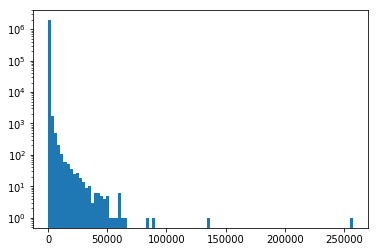

In [8]:
plt.hist(data['#Retweets'], log=True, bins=100) 
plt.show()

In [9]:
data.sort_values(by='#Retweets', ascending=False)

,Tweet Id,Username,Timestamp,#Followers,#Friends,#Retweets,#Favorites,Entities,Sentiment,Mentions,Hashtags,URLs
1637862,1265465820995411973,0d4d9b3135ab4271ea36f4ebf8e9eae9,Wed May 27 02:12:17 +0000 2020,3317,3524,257467,845579,tear gas:Tear_gas:-1.688018296396458;,1 -1,null;,null;,null;
1208647,1266553959973445639,c9378a990def5939fb179e034a0d402e,Sat May 30 02:16:10 +0000 2020,18661,0,135818,363852,null;,1 -3,null;,null;,null;
1328169,1258750892448387074,1921c65230cd080c689dc82ea62e6e74,Fri May 08 13:29:33 +0000 2020,83320,1753,88667,224288,mike pence:Mike_Pence:-0.6712149436851893;ppe:...,1 -1,null;,null;,null;
1736035,1263579286201446400,7c4529bc4da01f288b95cd3876b4da47,Thu May 21 21:15:52 +0000 2020,451,359,82495,225014,null;,1 -1,null;,null;,null;
751238,1266546753182056453,32634ab407c86a56dde59551b3871c42,Sat May 30 01:47:31 +0000 2020,1545,874,66604,193599,douche:Douche:-2.0041883604919835;,3 -1,null;,null;,null;
702118,1259975524581064704,69745f3009b864ba75b7d066ade0adba,Mon May 11 22:35:48 +0000 2020,6106969,726,63054,248214,null;,1 -1,null;,null;,null;
1037044,1266738565641371648,71b9c38db144b44e4cbbda75c9fbf272,Sat May 30 14:29:43 +0000 2020,45941,4550,61422,100570,null;,1 -1,null;,null;,null;
482286,1267066200049229824,56eb2d106e7611ab8bb76de07af8f318,Sun May 31 12:11:37 +0000 2020,678,524,61038,101117,quarantine:Quarantine:-2.3096035868012508;,2 -1,null;,null;,null;
1812643,1256657625334284292,6b7cc62c18b45d1eee1c34eb375e72a4,Sat May 02 18:51:40 +0000 2020,778,694,60719,213614,null;,1 -1,null;,null;,null;
1401494,1260237550091935746,6b49e6ca36daebd1048d59b1459026ae,Tue May 12 15:57:00 +0000 2020,3704,1144,60650,214508,flatten the curve:Flatten_the_curve:-1.6515462...,1 -1,null;,null;,null;
